In [2]:
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot
import os

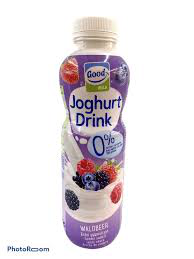

In [8]:
# load the image

os.getcwd()
image = Image.open("/Users/jonpradabenito/Ironhack/4.Projects/6. Final/garbage_classification/plastic/plastic1.jpg")
image

In [9]:
# convert image to numpy array
data = asarray(image)
print(type(data))

# summarize shape
print(data.shape)

display(data[:,:,0])

<class 'numpy.ndarray'>
(259, 194, 3)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

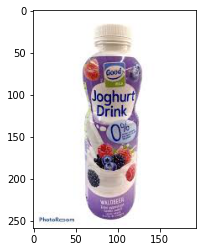

In [11]:
# display the array of pixels as an image
pyplot.imshow(data)

In [12]:
print("R ranges between ", data[:,:,0].max(), data[:,:,0].min())
print("B ranges between ", data[:,:,1].max(), data[:,:,1].min())
print("G ranges between ", data[:,:,2].max(), data[:,:,2].min())

R ranges between  255 0
B ranges between  255 0
G ranges between  255 0


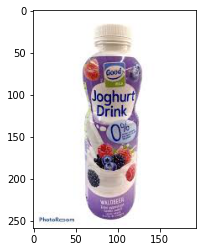

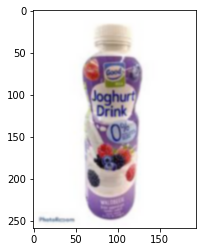

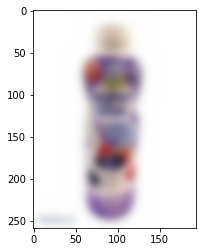

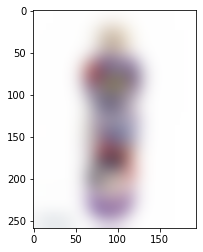

In [19]:
from scipy.ndimage import gaussian_filter
# Gaussian Filter: The closer points have more impact than the further points
# Filtering in an image is data treatment, no removal!

sigmas = [0, 1, 5, 10]
for std in sigmas:
    data_filtered = gaussian_filter(data, sigma=std)

    for c in [0,1,2]:
        data_filtered[:,:,c] = gaussian_filter(data[:,:,c], sigma=std)

    pyplot.imshow(data_filtered)
    pyplot.show()
    

In [ ]:
sigmas = [0]#, 1, 5, 10]
for std in sigmas:
    data_filtered = gaussian_filter(data, sigma=std)

    for c in [0,1,2]:
        data_filtered[:,:,c] = gaussian_filter(data[:,:,c], sigma=std)

    pyplot.imshow(data_filtered)
    pyplot.show()

## K-Means

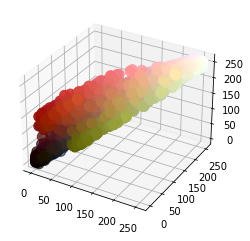

In [14]:
from matplotlib import pyplot as plt

pixel_array = data_filtered.reshape(data.shape[0]*data.shape[1], 3) 
pixel_array

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = pixel_array[:, 0]
xdata = pixel_array[:, 1]
ydata = pixel_array[:, 2]
pixel_array
ax.scatter3D(xdata, ydata, zdata, s=100, facecolor=pixel_array/255);

In [20]:
pixel_array


array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

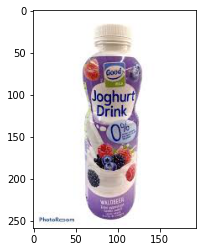

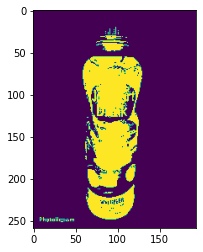

In [15]:
# Clustering by the color only
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(pixel_array)
data_labels = kmeans.labels_
data_labels.shape

data_labels = data_labels.reshape(data.shape[0], data.shape[1])
data_labels.shape

pyplot.imshow(data)
pyplot.show()

pyplot.imshow(data_labels*255)
pyplot.show()